In [17]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import sbml_constants as const

In [18]:
out_dir = '../explore_var/'

In [19]:
df_c3_nxl = pd.read_csv('../explore_var/c3_nxl.csv')
df_c3b_nxl = pd.read_csv('../explore_var/c3b_nxl.csv')

In [20]:
df_xt_imp = pd.read_csv('/home/kai/Projects/c3_v2/xtract_results_ld28/xtract_out_from_bagcontainer_sky_imp.csv')
df_xt = pd.read_csv('/home/kai/Projects/c3_v2/xtract_results_ld28/xtract_out_from_bagcontainer_sky.csv')

In [21]:
dfm = pd.merge(df_c3_nxl.drop(columns=['uID_rev']), df_xt_imp.drop(columns=['link_type', 'log2ratio', 'log2avg', 'imputed', 'ms1_area_sum', 'experiment', 'referenceexperiment']), on='uID').rename(columns={'ms1_area_sum_ref': 'ms1_area_sum', 'imputed_ref': 'imputed'})
dfm_rev = pd.merge(df_c3_nxl.drop(columns=['uID']).rename(columns={'uID_rev': 'uID'}), df_xt_imp.drop(columns=['link_type', 'log2ratio', 'log2avg', 'imputed', 'ms1_area_sum', 'experiment', 'referenceexperiment']), on='uID').rename(columns={'ms1_area_sum_ref': 'ms1_area_sum', 'imputed_ref': 'imputed'})
df_xt_merge = pd.concat([dfm, dfm_rev])

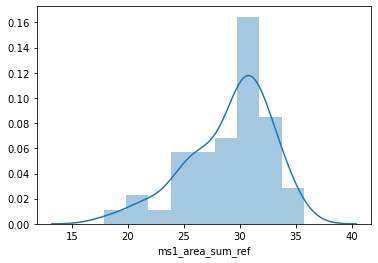

In [6]:
sns.distplot((df_xt_imp[(df_xt_imp[const.S_LINK_TYPE] == 'monolink')]['ms1_area_sum_ref']))

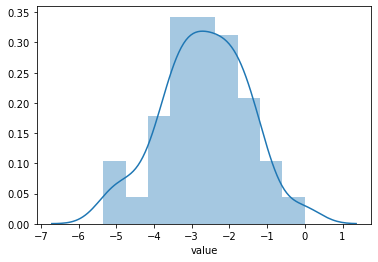

In [7]:
sns.distplot(np.log2(df_c3_nxl[(df_c3_nxl['Crosslinker'] == 100) & (df_c3_nxl[const.S_LINK_TYPE] == 'MonoHydro')][const.S_VALUE]))

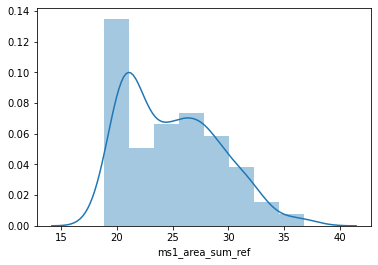

In [8]:
sns.distplot((df_xt_imp[(df_xt_imp[const.S_LINK_TYPE] != 'monolink')]['ms1_area_sum_ref']))

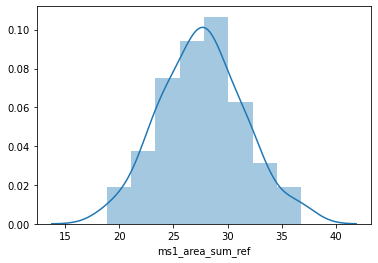

In [9]:
sns.distplot((df_xt_imp[(df_xt_imp[const.S_LINK_TYPE] != 'monolink') & (df_xt_imp['imputed_ref'] == 0) & (df_xt_imp['imputed'] == 0)]['ms1_area_sum_ref']))

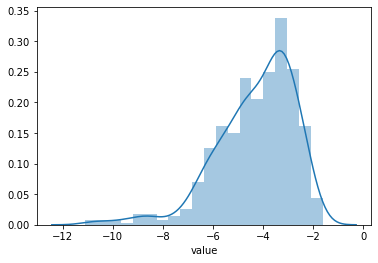

In [10]:
sns.distplot(np.log2(df_c3_nxl[(df_c3_nxl['Crosslinker'] == 100) & (df_c3_nxl[const.S_LINK_TYPE] == 'XL')][const.S_VALUE]))

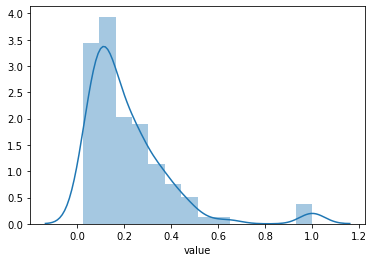

In [11]:
sns.distplot(df_c3_nxl[(df_c3_nxl['Crosslinker'] == 100) & (df_c3_nxl[const.S_LINK_TYPE] == 'MonoHydro') ][const.S_VALUE])

In [22]:
c_c3_abs = alt.Chart(df_xt_merge[df_xt_merge['imputed'] == 0]).mark_point().encode(
    y=alt.Y('ms1_area_sum'),
    x=alt.X(const.S_VALUE, scale=alt.Scale(type='log')),
    row=const.S_LINK_TYPE,
    column='Crosslinker'
).resolve_scale(x='independent')

In [23]:
c_c3_abs

alt.Chart(...)

In [24]:
c_c3_abs.save(out_dir + 'c3_exp_abs.png', scale_factor=2)

In [25]:
def get_log2_df(df_s1, df_s2, name_s1, name_s2, var):
    df_merge = pd.merge(
        df_s1,
        df_s2,
        on=[const.S_VAR, const.S_LINK_TYPE, const.S_UID, const.S_UID_REV, const.S_UID_SHORT, var],
        suffixes=["_" + name_s1, "_" + name_s2],
    )
    df_merge[const.S_LOG2RATIO] = np.log2(
        df_merge[f'{const.S_VALUE}_{name_s2}'] / df_merge[f'{const.S_VALUE}_{name_s1}'])
    df_merge = (
        df_merge.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
    )
    return df_merge

In [26]:
df_log2_nxl = get_log2_df(df_c3_nxl, df_c3b_nxl, 'c3', 'c3b', 'Crosslinker')

In [59]:
alt.Chart(df_log2_nxl).mark_point().encode(
    y=alt.Y(const.S_LOG2RATIO),
    #x=alt.X(const.S_VALUE, scale=alt.Scale(type='log')),
    column=const.S_LINK_TYPE,
    x='Crosslinker:N'
).resolve_scale(x='independent')

alt.Chart(...)

In [51]:
alt.Chart(df_log2_nxl).mark_point().encode(
    y=alt.Y(f'mean({const.S_LOG2RATIO})'),
    #x=alt.X(const.S_UID_SHORT),
    x=alt.X('Crosslinker', scale=alt.Scale(type='log')),
    color=const.S_LINK_TYPE,
)

alt.Chart(...)

In [63]:
c_log2_sim_dist = alt.Chart(df_log2_nxl).mark_boxplot().encode(
    y=alt.Y(const.S_LOG2RATIO),
    #x=alt.X(const.S_UID_SHORT),
    x=alt.X('Crosslinker:N'),
    column=const.S_LINK_TYPE,
)

In [64]:
c_log2_sim_dist.save(out_dir + 'log2_sim_dist.png', scale_factor=2)

In [65]:
#sns.catplot(data=df_log2_nxl, y=const.S_LOG2RATIO, x='Crosslinker', hue=const.S_LINK_TYPE, kind='box')

In [66]:
c_log2_exp_dist = alt.Chart(df_xt).mark_boxplot().encode(
    y=alt.Y(const.S_LOG2RATIO),
    #x=alt.X(const.S_UID_SHORT),
   # x=alt.X('Crosslinker', scale=alt.Scale(type='log')),
    column=const.S_LINK_TYPE,
)

In [67]:
c_log2_exp_dist.save(out_dir + 'log2_exp_dist.png', scale_factor=2)

In [28]:
def get_xt_log2_merge(df_log2, df_xtract, var):
    dfm_f = pd.merge(
        df_log2[[const.S_UID, const.S_LOG2RATIO, const.S_LINK_TYPE, var]],
        df_xtract[[const.S_UID, const.S_LOG2RATIO]],
        on=[const.S_UID],
        suffixes=[const.S_SUFFIX_SIM, const.S_SUFFIX_EXP],
    )
    dfm_rev = pd.merge(
        df_log2[[const.S_UID_REV, const.S_LOG2RATIO, const.S_LINK_TYPE, var]].rename(columns={const.S_UID_REV: const.S_UID}),
        df_xtract[[const.S_UID, const.S_LOG2RATIO]],
        on=[const.S_UID],
        suffixes=[const.S_SUFFIX_SIM, const.S_SUFFIX_EXP],
    )
    return pd.concat([dfm_f, dfm_rev]).drop_duplicates().reset_index(drop=True)

In [29]:
df_log2_exp_sim_merge = get_xt_log2_merge(df_log2_nxl, df_xt, 'Crosslinker')

In [30]:
alt.Chart(df_log2_exp_sim_merge).mark_point().encode(
    y=alt.Y(const.S_LOG2RATIO + const.S_SUFFIX_EXP),
    x=alt.X(const.S_LOG2RATIO + const.S_SUFFIX_SIM),
    row=const.S_LINK_TYPE,
    column='Crosslinker'
)

alt.Chart(...)

In [68]:
c_log2_corr_nxl = alt.Chart(df_log2_exp_sim_merge[(df_log2_exp_sim_merge['Crosslinker'] == 10) | (df_log2_exp_sim_merge['Crosslinker'] == 100) | (df_log2_exp_sim_merge['Crosslinker'] == 1000)]).mark_point().encode(
    y=alt.Y(const.S_LOG2RATIO + const.S_SUFFIX_EXP),
    x=alt.X(const.S_LOG2RATIO + const.S_SUFFIX_SIM),
    row=const.S_LINK_TYPE,
    column='Crosslinker'
)

In [69]:
c_log2_corr_nxl.save(out_dir + 'log2_corr_nxl.png', scale_factor=2)